<a href="https://colab.research.google.com/github/Ishaa-ux/Master/blob/main/Uber_supply_demand_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Uber supply demand gap analysis:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv("/content/UBER DATA.csv")

df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         301 non-null    int64  
 1   Pickup point       301 non-null    object 
 2   Driver id          300 non-null    float64
 3   Status             301 non-null    object 
 4   Request timestamp  301 non-null    object 
 5   Drop timestamp     300 non-null    object 
 6   Request hour       301 non-null    int64  
 7   Request date       301 non-null    object 
 8   Drop hour          301 non-null    object 
 9   Drop date          300 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 23.6+ KB


In [ ]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'],format="%d-%m-%Y %H:%M" )
df['Hour']= df['Request timestamp'].dt.hour
df['Date']= df['Request timestamp'].dt.date
df['Day']= df['Request timestamp'].dt.day_name()

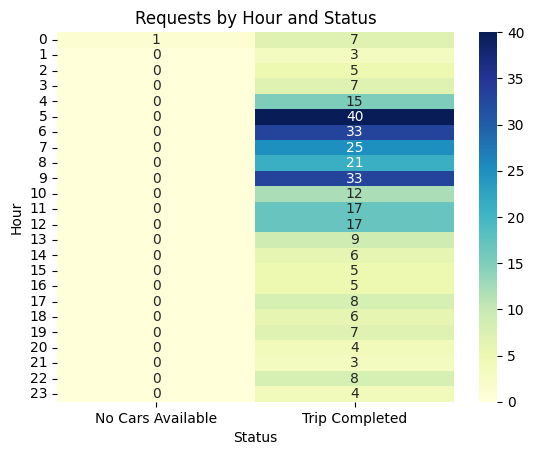

In [ ]:
# Hour and status:
heatmap= pd.crosstab(df['Hour'], df['Status'])

sns.heatmap(heatmap, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Requests by Hour and Status")
plt.xlabel("Status")
plt.ylabel("Hour")
plt.show()


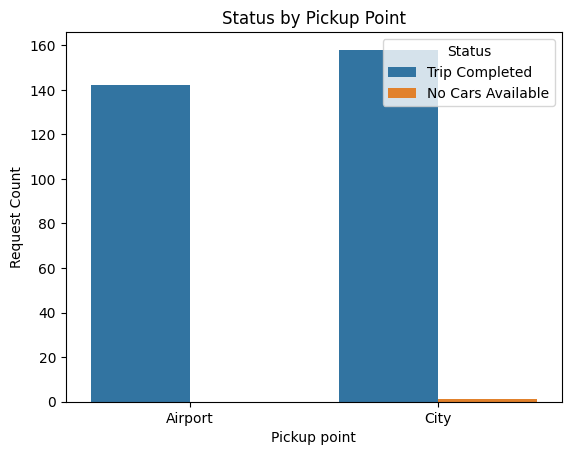

In [ ]:
#Pickup vs status
sns.countplot(df, x='Pickup point', hue='Status')
plt.title("Status by Pickup Point")
plt.xlabel("Pickup point")
plt.ylabel("Request Count")
plt.show()



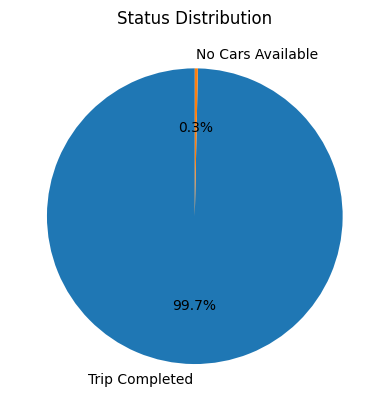

In [ ]:
#Status Distribution:
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%',startangle=90, title="Status Distribution")
plt.ylabel('')
plt.show()


In [ ]:
df.drop_duplicates(subset='Request id', inplace=True)

In [ ]:
# adding time slot column:
def addtimeslot(hour):
  if 4 <= hour < 8:
      return 'Early Morning'
  elif 8 <= hour < 12:
      return 'Morning'
  elif 12 <= hour < 16:
      return 'Afternoon'
  elif 16 <= hour < 20:
      return 'Evening'
  elif 20 <= hour < 24:
      return 'Night'
  else:
       return 'Late Night'

df['Time Slot'] = df['Request hour'].apply(addtimeslot)



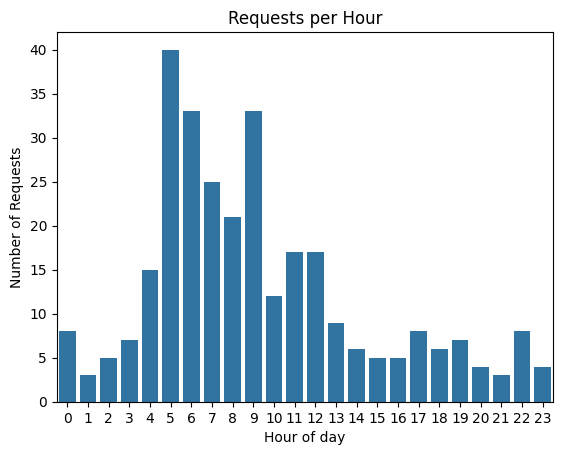

In [ ]:
# Requests per hour

df['Request timestamp'] = pd.to_datetime(df['Request timestamp'],format="%d-%m-%Y %H:%M" )
df['Hour']= df['Request timestamp'].dt.hour
df['Date']= df['Request timestamp'].dt.date
df['Day']= df['Request timestamp'].dt.day_name()

sns.countplot(df, x='Hour', order=sorted(df['Hour'].dropna().unique()))
plt.title("Requests per Hour")
plt.xlabel("Hour of day")
plt.ylabel("Number of Requests")
plt.show()

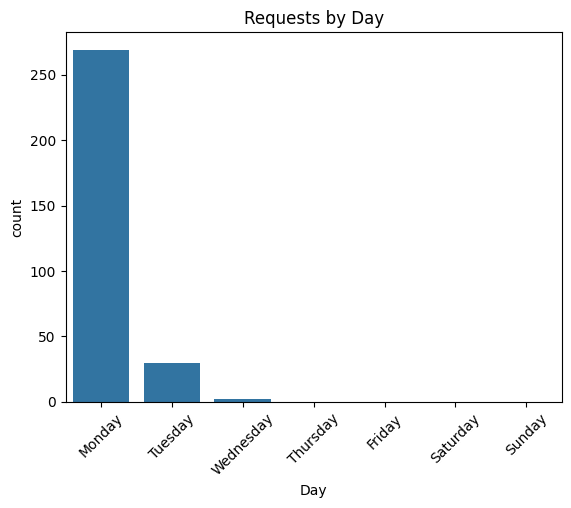

In [ ]:
# Requests by day
sns.countplot(df, x='Day', order=['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Requests by Day")
plt.xticks(rotation=45)
plt.show()

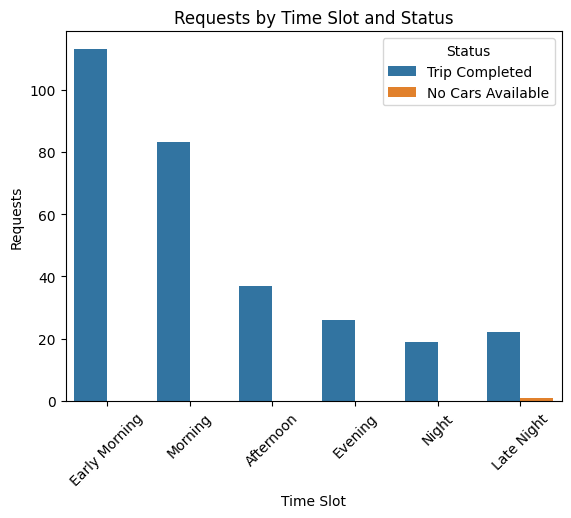

In [ ]:
#Requests by time slot and status
sns.countplot(df, x='Time Slot', hue='Status', order=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night','Late Night'])
plt.title("Requests by Time Slot and Status")
plt.xticks(rotation=45)
plt.ylabel("Requests")
plt.show()

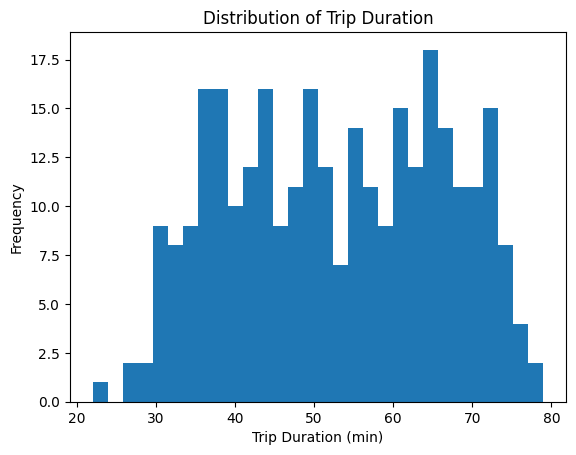

In [ ]:
# Completed Trips with Duration
df['Drop timestamp'] =pd.to_datetime(df['Drop timestamp'], format="%d-%m-%Y %H:%M")

df['Trip Duration (min)'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60
df['Trip Duration (min)'].dropna().plot.hist(bins=30)
plt.title("Distribution of Trip Duration")
plt.xlabel("Trip Duration (min)")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Top 10 drivers ')

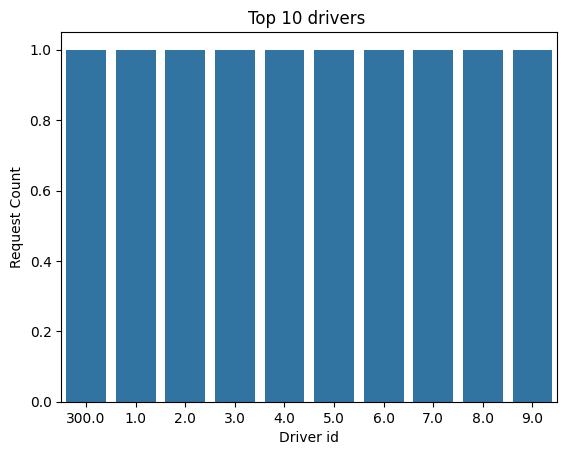

In [ ]:
#Driver wise request:
topdrivers=df['Driver id'].value_counts().head(10)
sns.barplot( x=topdrivers.index.astype(str), y=topdrivers.values)
plt.xlabel("Driver id")
plt.ylabel("Request Count")
plt.title("Top 10 drivers ")


In [ ]:
#Peak demand is during Morning (5–9 AM) and Night (8–11 PM).

Most cancellations happen during Early Morning from City to Airport.

No Cars Available is highest for Airport to City at Night.

Many drivers handle multiple requests – could be leveraged better in peak hours.

Uber faces a clear supply-demand mismatch in early and late hours.



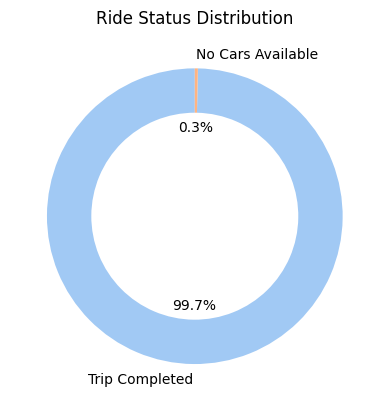

In [ ]:
# Donut chart: Ride status distribution
statuscount= df['Status'].value_counts()
plt.pie(statuscount, labels=statuscount.index, autopct='%1.1f%%',wedgeprops={'width':0.3} , startangle=90, colors=sns.color_palette('pastel'))
plt.title("Ride Status Distribution")
plt.show()

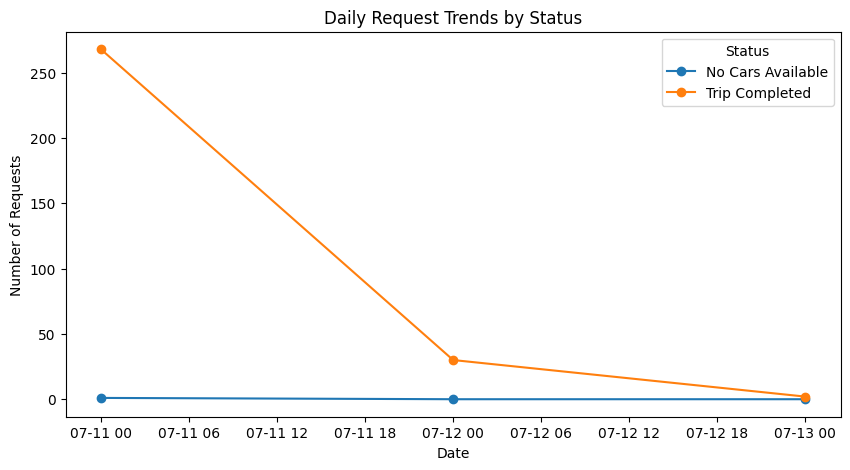

In [ ]:
# Line plot: Daily Request trend
df['Date'] = df['Request timestamp'].dt.date
daily_status = df.groupby(['Date', 'Status']).size().unstack().fillna(0)
daily_status.plot(figsize=(10,5), marker='o')
plt.title("Daily Request Trends by Status")
plt.ylabel("Number of Requests")
plt.show()

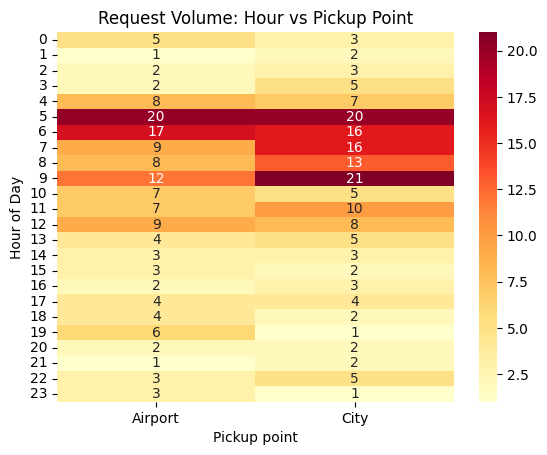

In [ ]:
# Heatmap: hour and pickpoint with status
heatdata = df.pivot_table(index='Hour', columns='Pickup point', values='Request id', aggfunc='count')
sns.heatmap(heatdata, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title("Request Volume: Hour vs Pickup Point")
plt.ylabel("Hour of Day")
plt.show()

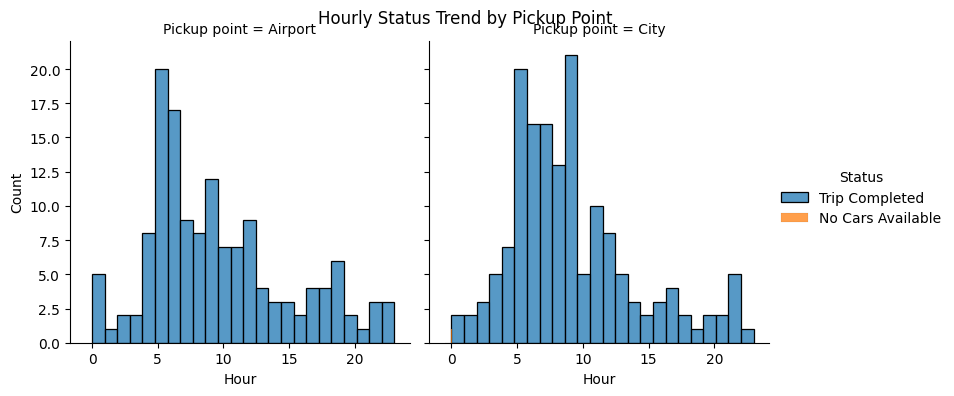

In [ ]:
# Facet grid: Statu strend by pickup point

g = sns.FacetGrid(df, col='Pickup point', hue='Status', col_wrap=2, height=4)
g.map(sns.histplot, 'Hour', bins=24, multiple='stack')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Hourly Status Trend by Pickup Point")
plt.show()

(<Figure size 640x480 with 1 Axes>,
 array([<Axes: ylabel='2016'>], dtype=object))

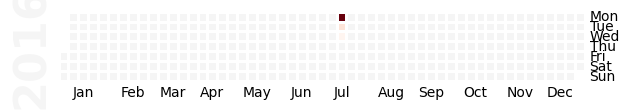

In [ ]:
#Calendat heatmap
# Only if you have calmap installed
!pip install calmap
import calmap
daily = df.groupby('Date').size()
daily.index = pd.to_datetime(daily.index)
calmap.calendarplot(daily)
